In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import os, fnmatch
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures 
import seaborn as sns
%matplotlib inline
from keras.layers import Input, Dense
from keras.models import Model
# from keras.op
from keras import optimizers
from keras import regularizers
from PIL import Image
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
all_tiff_files = []
listOfFiles = os.listdir('./clean_data/obj_test_res')
pattern = "*.tiff"
for entry in listOfFiles:
    if fnmatch.fnmatch(entry, pattern):
            all_tiff_files.append('./clean_data/obj_test_res/'+entry)

In [3]:
print(len(all_tiff_files))

42171


In [4]:
images_list = []
half_size = int(len(all_tiff_files) / 2)
max_size = 0
for i in range(half_size):
    im = Image.open(all_tiff_files[i])
    arr = np.array(im).flatten()
    arr=(arr-arr.min())/(arr.max()-arr.min())
    if len(arr) > max_size:
        max_size = len(arr)
    images_list.append(arr)

for i in range(half_size, len(all_tiff_files)):
    im = Image.open(all_tiff_files[i])
    arr = np.array(im).flatten()
    arr=(arr-arr.min())/(arr.max()-arr.min())
    if len(arr) > max_size:
        max_size = len(arr)
    images_list.append(arr)   

In [5]:
#val_min = 0
#val_max = 0
#for i in range(len(images)):
#    if np.min(images[i]) < val_min:
#        val_min = np.min(images[i])
#    if np.max(images[i]) > val_max:
#        val_max = np.max(images[i])

#print(val_min, val_max)

In [6]:
#for i in range(len(images)):
#    arr = images[i]
#    images[i] = (arr-val_min) / (val_max - val_min)


In [7]:
for i in range(len(images_list)):
    diff = max_size - len(images_list[i])
    half_1 = int(diff / 2)
    half_2 = diff - half_1
    front_arr = np.zeros(half_1)
    back_arr = np.zeros(half_2)
    images_list[i] = np.insert(images_list[i], 0, front_arr, axis=0)
    images_list[i] = np.insert(images_list[i], len(images_list[i] - 1), back_arr, axis=0)
    
images = np.array(images_list)

In [8]:
print(max_size, len(images[13689]))

3927 3927


In [9]:
from tensorflow.python.client import device_lib
import tensorflow as tf
import keras
print(device_lib.list_local_devices())

config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3060306659626164028
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1441641267
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8069972739273843694
physical_device_desc: "device: 0, name: GeForce GTX 750 Ti, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


In [10]:
X_train, X_test = train_test_split(images, test_size=0.2, random_state=100)

In [11]:
X_train = np.array(X_train)
X_test = np.array(X_test)

#for i in range(max_size):
#    print(X_train[1268][i])
print(max_size)

3927


In [12]:
inpu_dim = max_size
h_1 = 1024
h_2 = 512
hidden_dim = 64
encoding_dim = 8

In [13]:
input_vect = Input(shape = (inpu_dim,))
h1 = Dense(h_1, activation="relu")(input_vect)
h2 = Dense(h_2, activation="relu")(h1)
h3 = Dense(hidden_dim, activation="relu")(h2)
encoded = Dense(encoding_dim, activation="relu")(h3)
h1 = Dense(hidden_dim, activation="relu")(encoded)
h3 = Dense(h_2, activation="relu")(h1)
h4 = Dense(h_1, activation="relu")(h3)
decoded = Dense(inpu_dim, activation="relu")(h4)

autoencoder = Model(input_vect, decoded)
encoder = Model(input_vect, encoded)

#encoded_input = Input(shape=(1024,))
#decoder_layer = autoencoder.layers[-1]
#decoder = Model(encoded_input, decoder_layer(encoded_input))

In [14]:
adadelta = optimizers.Adadelta(lr=0.9, rho=0.95)
#adam = keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [15]:
autoencoder.compile(optimizer=adadelta, loss = "MSE",metrics=['mean_squared_error'])

In [16]:
history = autoencoder.fit(X_train, X_train, epochs = 5000, batch_size = 1024, shuffle=True, validation_data=(X_test, X_test))



Train on 33736 samples, validate on 8435 samples
Epoch 1/5000




33736/33736 [==============================] - 6s 170us/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 2/5000
33736/33736 [==============================] - 5s 139us/step - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 3/5000
33736/33736 [==============================] - 5s 138us/step - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 4/5000
33736/33736 [==============================] - 5s 137us/step - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 5/5000
33736/33736 [==============================] - 5s 138us/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 6/5000
33736/33736 [==============================] - 5s 137us/step - loss: 0.0132 - mean

KeyboardInterrupt: 

In [17]:

plt.plot(history.history['mean_squared_error'], label='MSE (train data)')
plt.plot(history.history['val_mean_squared_error'], label='MSE (val data)')
plt.title('MSE for Chennai Reservoir Levels')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

NameError: name 'history' is not defined

In [19]:
encoded_values = encoder.predict(X_train)
#decoded_values = decoder.predict(encoded_values)

NameError: name 'decoded_values' is not defined

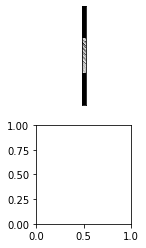

In [19]:
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(299,12))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_values[i].reshape(299,12))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [20]:
kmeans_df = pd.DataFrame(encoded_values);

In [21]:
kmeans_df.head()

,0,1,2,3,4,5,6,7
0,0.227405,1.035978,0.0,0.000000,0.118158,0.0,0.413697,0.665763
1,0.190320,2.148332,0.0,0.000000,0.265718,0.0,0.769939,1.280197
2,0.151350,1.989243,0.0,0.000000,0.120543,0.0,0.478705,1.226243
3,0.016327,1.788134,0.0,0.000000,0.066010,0.0,0.395054,1.149930
4,0.023524,1.013913,0.0,0.010824,0.108100,0.0,0.382705,0.734944


In [24]:
Sum_of_squared_distances = []
K = range(1,5)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(encoded_values)
    Sum_of_squared_distances.append(km.inertia_)

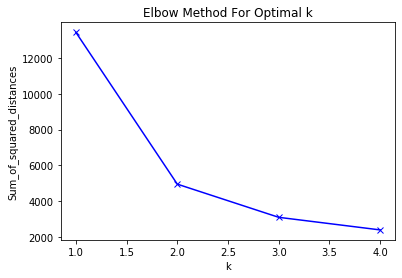

In [25]:

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

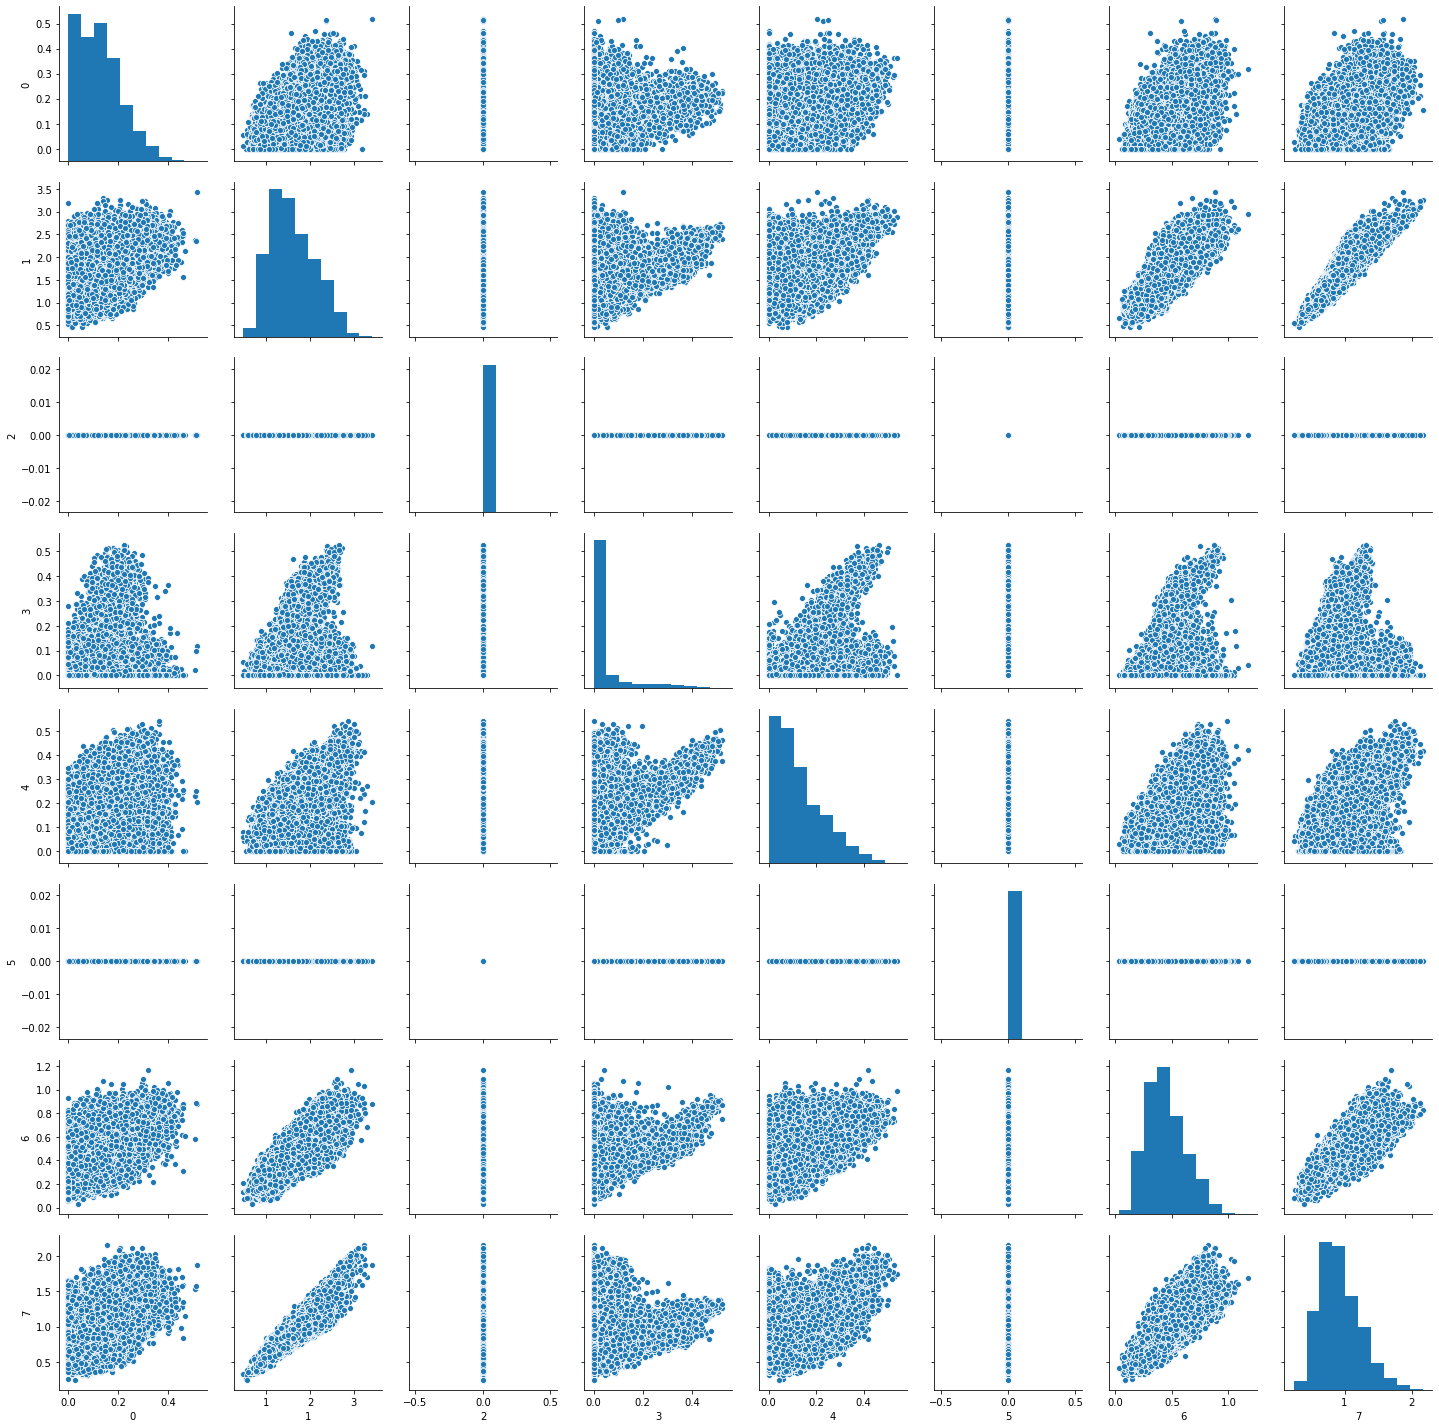

In [26]:
sns.pairplot(kmeans_df)

In [116]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
X = encoded_values
db = DBSCAN(eps=3.5, min_samples=100).fit(X)

In [117]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

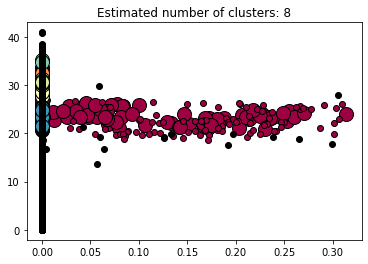

In [118]:


# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [15]:
images = np.array(images_list)
print(images.shape)

(42171, 3927)


In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(.95)

In [18]:
principalComponents = pca.fit_transform(images)

In [19]:
principalComponents.shape

(42171, 544)

In [20]:
inpu_dim = principalComponents.shape[1]
h_1 = 1024
h_2 = 512
hidden_dim = 64
encoding_dim = 8

In [21]:
X_train, X_test = train_test_split(principalComponents, test_size=0.3, random_state=100)

In [22]:
input_vect = Input(shape = (inpu_dim,))
h1 = Dense(hidden_dim, activation="relu")(input_vect)
encoded = Dense(encoding_dim, activation="relu")(h1)
h2 = Dense(hidden_dim, activation="relu")(encoded)
decoded = Dense(inpu_dim)(h2)

autoencoder = Model(input_vect, decoded)
encoder = Model(input_vect, encoded)

In [26]:
adadelta = optimizers.Adadelta(lr=0.5, rho=0.95)

In [27]:
autoencoder.compile(optimizer=adadelta, loss = "MSE",metrics=['mean_squared_error'])

In [1]:
history = autoencoder.fit(X_train, X_train, epochs = 1000, batch_size = 2048, shuffle=True, validation_data=(X_test, X_test))

NameError: name 'autoencoder' is not defined

In [30]:
plt.plot(history.history['mean_squared_error'], label='MSE (train data)')
plt.plot(history.history['val_mean_squared_error'], label='MSE (val data)')
plt.title('MSE for Chennai Reservoir Levels')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

NameError: name 'history' is not defined

In [31]:
encoded_values = encoder.predict(X_test)

In [121]:
Sum_of_squared_distances = []
K = range(1,12)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(encoded_values)
    Sum_of_squared_distances.append(km.inertia_)

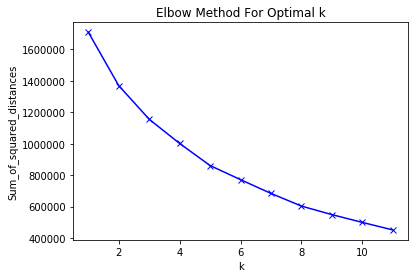

In [122]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

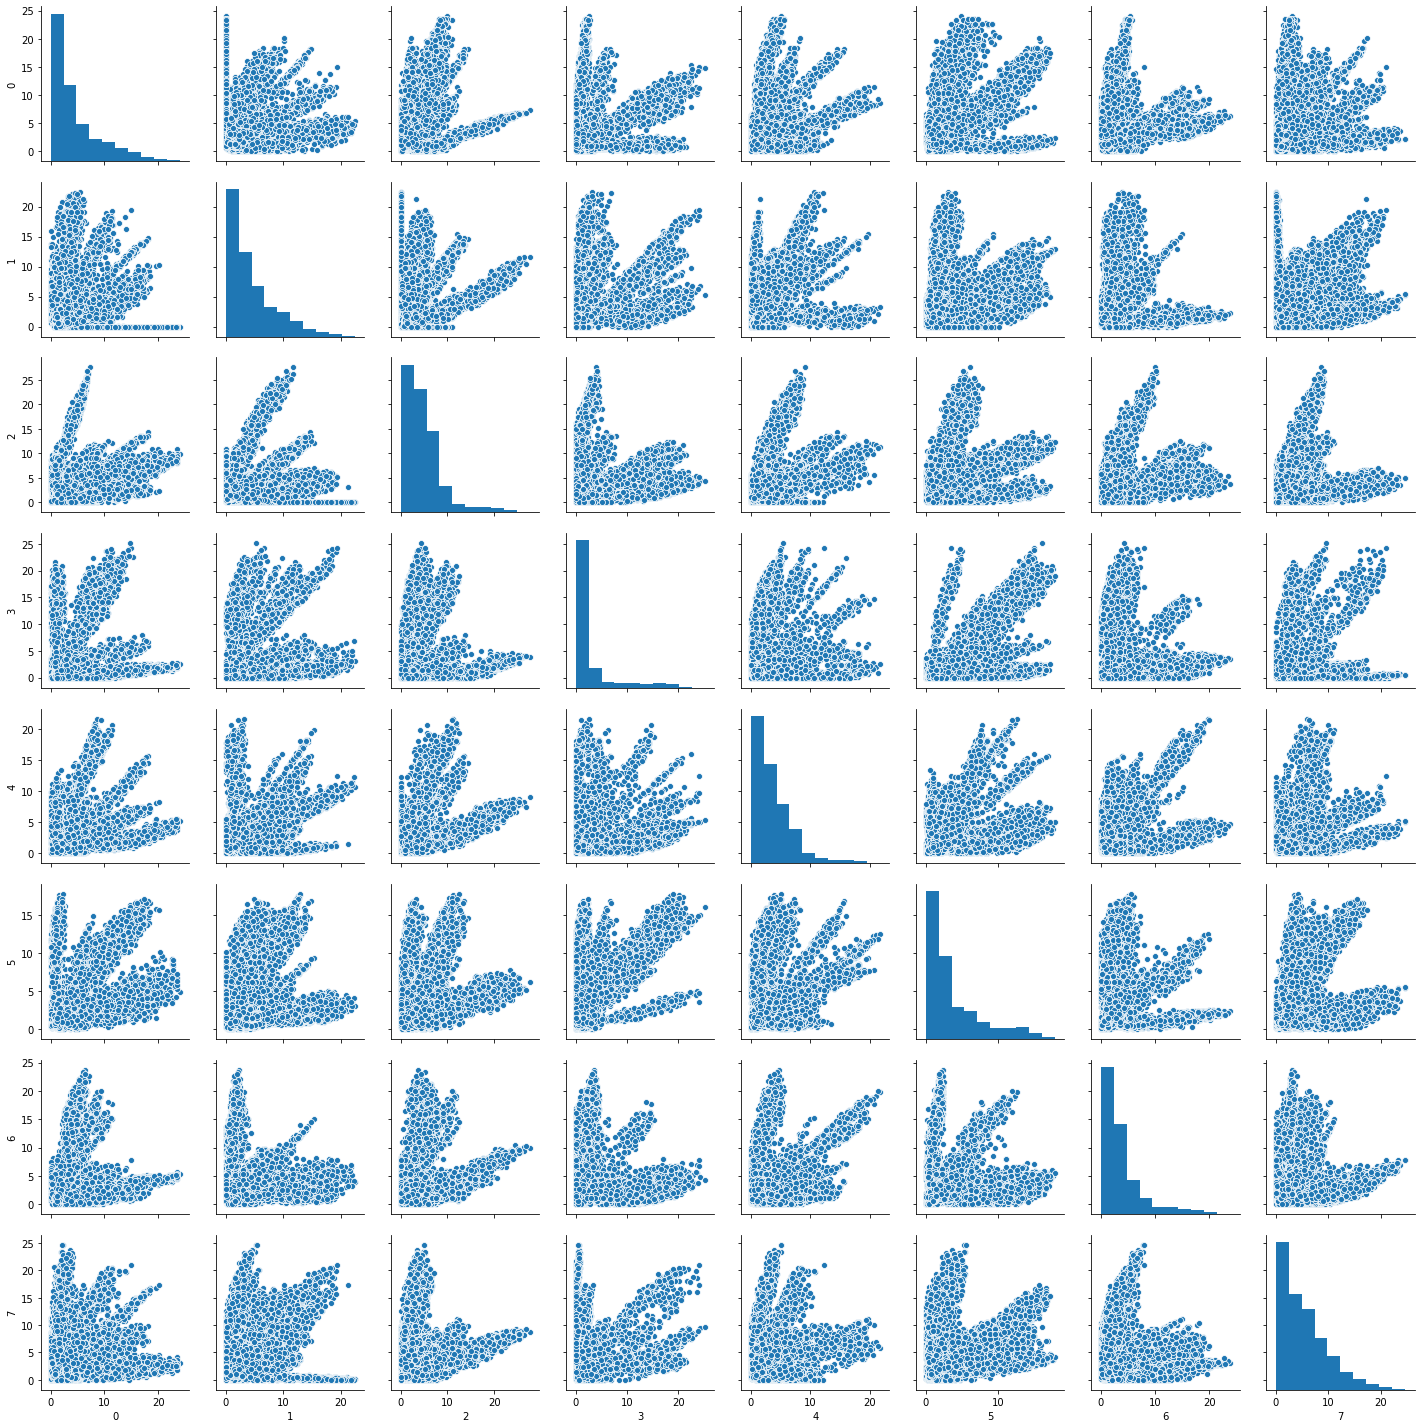

In [123]:
sns.pairplot(pd.DataFrame(encoded_values))

In [27]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(encoded_values)

ValueError: 'n_components' should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree.

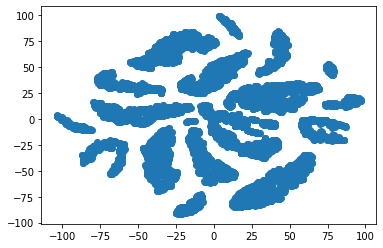

In [125]:
plt.scatter(X_embedded[:,0], X_embedded[:,1])

In [132]:
Sum_of_squared_distances = []
K = range(15,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_embedded)
    Sum_of_squared_distances.append(km.inertia_)

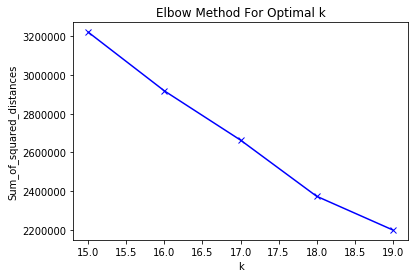

In [133]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

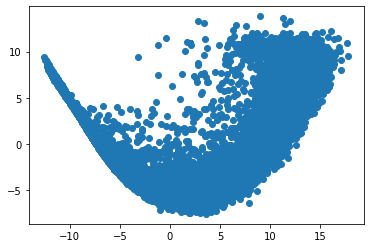

In [19]:
#plt.scatter(principalComponents[:,0],principalComponents[:,1])

In [ ]:
#from sklearn.manifold import TSNE
#X_embedded = TSNE(n_components=2).fit_transform(images_np)

In [54]:
#plt.scatter(X_embedded[:,0],X_embedded[:,1])
X_embedded.shape

(12652, 2)

In [119]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
X = X_embedded
db = DBSCAN(eps=21, min_samples=1000).fit(X)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

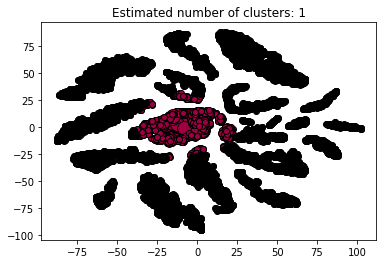

In [120]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()